In [46]:
import os
import smtplib
import requests
import pandas as pd
import numpy as np
import time

from email.message import EmailMessage
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
from dotenv import load_dotenv
from bloxs import B

plt.style.use('ggplot')

_ = load_dotenv() 

In [48]:
##### CLASSES EMAILSERVICE
class EmailService:
    def __init__(self):
        self.address = os.environ.get("EMAIL_ADDRESS")
        self.password = os.environ.get("EMAIL_PASSWORD")
        
    def send(self, to_address, subject, message):
        msg = EmailMessage()
        msg['Subject'] = subject
        msg['From'] = self.address
        msg['To'] = to_address
        msg.set_content(message)
        
        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
            smtp.login(self.address, self.password)
            smtp.send_message(msg)

In [58]:
##### CLASSES Crypto
class Crypto:
    def __init__(self, symbol_src,symbol_trg, interval ="1d", limit = 30):
        self.symbol_src = symbol_src
        self.symbol_trg = symbol_trg
        self.symbol = f"{symbol_src}{symbol_trg}"
        #self.address = os.environ.get("EMAIL_ADDRESS")
        #self.password = os.environ.get("EMAIL_PASSWORD")
        self.interval = interval
        self.limit = limit
        self.date_creation = time.time()

    def change_data(self, interval, limit):
        self.interval = interval
        self.limit = limit
        return self.refresh_data()

    def refresh_data(self):
        try:
            #print(f"Refresh Data {self.symbol} {self.interval} {self.limit}")
            response = requests.get(f"https://www.binance.com/api/v1/klines?symbol={self.symbol}&interval={self.interval}&limit={self.limit}")
            candles = response.json()
            #print(f"Refresh Data2 {response.json()}")
            self.data = pd.DataFrame(candles, columns=["Open time", "Open", "High", "Low", "Close", "Volume", 
                                            "Close time", "Quote", "Trades", "BaseVol", "QuoteVol", "Igonre"])
            self.data["Date"] = pd.to_datetime(self.data["Open time"], unit='ms')
            for col in ["Open", "High", "Low", "Close", "Volume"]:
                self.data[col] = self.data[col].astype(float)
            self.data = self.data.set_index('Date')
            
            self.date_refresh = time.time()
            return True
        except Exception as e:
            print(str(e))
            return False

    def plot(self):
        try:
            ##### plot charts
            fig, ax = plt.subplots(1, 1, figsize=(17,5))
            _=ax[0].plot(self.data.Close, color="orange", linewidth=3)
            ax[0].title.set_text(self.simbol)
            ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
            _=ax[0].set_ylabel("USDT")
        except Exception as e:
            print(str(e))

    def period(self):
        if self.interval.endswith("y") == True:
            suffix2 = "(Yearly)"
        elif self.interval.endswith("m") == True:
            suffix2 = "(Monthly)"
        elif self.interval.endswith("w") == True:
            suffix2 = "(Weekly)"
        elif self.interval.endswith("d") == True:
            suffix2 = "(Daily)"
        elif self.interval.endswith("h") == True:
            suffix2 = "(Hourly)"
        else:
            suffix2 = ""
        return suffix2
    
    def getDateFormat(self):
        if self.interval.endswith("y") == True:
            #suffix2 = "(Yearly)"
            date_format2 = '%Y'
        elif self.interval.endswith("m") == True:
            #suffix2 = "(Monthly)"
            date_format2 = '%Y-%m'
        elif self.interval.endswith("w") == True:
            #suffix2 = "(Weekly)"
            date_format2 = '%b-%d'
        elif self.interval.endswith("d") == True:
            #suffix2 = "(Daily)"
            date_format2 = '%b-%d'
        elif self.interval.endswith("h") == True:
            #suffix2 = "(Hourly)"
            date_format2 = '%H:%M'
        else:
            #suffix2 = ""
            date_format2 = '%b-%d'
        return date_format2

    def subplot(self, crypto2):
        try:
            plt.style.use('ggplot')
            suffix = self.period()
            suffix2 = crypto2.period()
            date_format= self.getDateFormat()
            date_format2= crypto2.getDateFormat()

            ##### plot finance charts
            fig, ax = plt.subplots(1, 2, figsize=(17,5))
            # plot1 
            _=ax[0].plot(self.data.Close, color="orange", linewidth=3)
            ax[0].title.set_text(f"{self.symbol} {suffix}")
            ax[0].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
            plt.setp(ax[0].get_xticklabels(), rotation = 15)
            _=ax[0].set_ylabel("USDT")

            # plot2 
            _=ax[1].plot(crypto2.data.Close, color="green", linewidth=3)
            ax[1].title.set_text(f"{crypto2.symbol} {suffix2}")
            ax[1].xaxis.set_major_formatter(mdates.DateFormatter(date_format2))
            plt.setp(ax[1].get_xticklabels(), rotation = 15)
            _=ax[1].set_ylabel("USDT")
        except Exception as e:
            print(str(e))

In [59]:
listCryptos = []
crypto_symbol = "BTC"
crypto_symbol2 = "ETH"

# using list comprehension to append instances to list
listCryptos += [Crypto(symbol_src,symbol_trg) for symbol_src,symbol_trg in [('BTC', 'USDT'), ('ETH', 'USDT'), ('BTC', 'ETH')]]

#listCryptos.append(Crypto(f"{crypto_symbol}USDT"))
#listCryptos.append(Crypto(f"{crypto_symbol2}USDT", "1h",24))
for obj in listCryptos:
    print(obj.symbol, obj.period(), sep=' - ')

objCrypto1 = listCryptos[0]
objCrypto2 = listCryptos[1]


BTCUSDT - (Daily)
ETHUSDT - (Daily)
BTCETH - (Daily)


In [52]:
objCrypto1.refresh_data()
objCrypto2.change_data(interval = "1w", limit = 12)

True

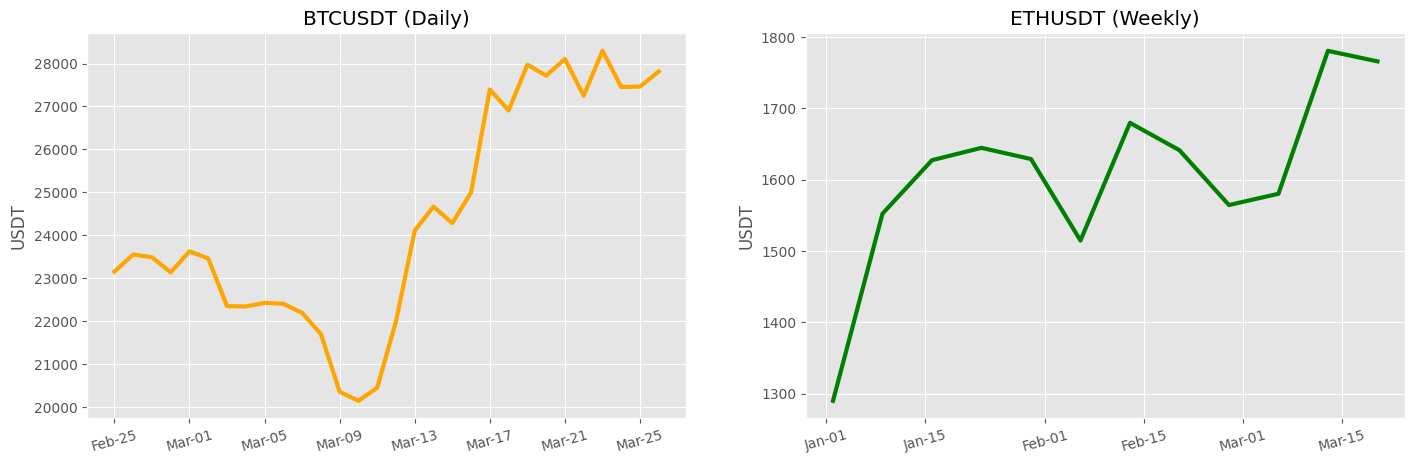

In [53]:
objCrypto1.subplot(listCryptos[1])

In [8]:
# Vecchio approccio
# Day intervals
crypto_day   = get_crypto_data(f"{crypto_symbol}USDT"  , "1d", 30)
crypto_day2  = get_crypto_data(f"{crypto_symbol2}USDT", "1d", 30)
# Hour Intervals
crypto_hour  = get_crypto_data(f"{crypto_symbol}USDT"  , "1h", 30)
crypto_hour2 = get_crypto_data(f"{crypto_symbol2}USDT", "1h", 30)

NameError: name 'get_crypto_data' is not defined

In [61]:
###### alerts

In [40]:
crypto_change = (objCrypto1.data.tail(7).Close.max() - objCrypto1.data.tail(7).Close.min())/objCrypto1.data.tail(7).Close.max()
crypto_change2 = (objCrypto2.data.tail(7).Close.max() - objCrypto2.data.tail(7).Close.min())/objCrypto2.data.tail(7).Close.max()

In [41]:
if crypto_change > 0.3: # crypto change over 30% send email notification
    EmailService().send("ithinkdiabolik@gmail.com", 
        "Crypto price large change alert", 
        f"Large price change ({np.round(crypto_change*100.0,2)}%) of {objCrypto1.symbol} in the last 7 days.")
    
if crypto_change2 > 0.3: # crypto change over 30% send email notification
    EmailService().send("ithinkdiabolik@gmail.com", 
        "Crypto price large change alert", 
        f"Large price change ({np.round(crypto_change2*100.0,2)}%) of {objCrypto2.symbol} in the last 7 days.")

In [42]:
B([
    #B(f"{np.round(stock_change*100, 2)}%", f"{stock_symbol} week change"),
    B(f"{np.round(crypto_change*100, 2)}%", f"{objCrypto1.symbol} {objCrypto1.period()} change"),
    B(f"{np.round(crypto_change2*100, 2)}%", f"{objCrypto2.symbol} {objCrypto2.period()} change"),
    #B(meteo.windgusts_10m.max(), f"Max wind gusts"),
])

In [45]:
B([
    #B(stock_hist.Close[-1].astype(int), f"{stock_symbol}"),
    B(objCrypto1.data.Close[-1].astype(int), f"{objCrypto1.symbol}"),
    B(objCrypto2.data.Close[-1].astype(int), f"{objCrypto2.symbol}"),
    #B(meteo.temperature_2m.max(), f"Max Temp"),
])